In [1]:
#Implement simple chatbot using Langgraph

In [2]:
from typing import Annotated,TypedDict
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()
groq_api_key=os.getenv('GROQ_API_KEY')
LLM=ChatGroq(model='llama-3.1-8b-instant',api_key=groq_api_key)

c:\Gen-Agent-AI\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
python-dotenv could not parse statement starting at line 2


In [5]:
#Creating nodes
def super_bot(state:State):
    return {"messages":LLM.invoke(state['messages'])}


In [6]:
from langgraph.graph import StateGraph
graph=StateGraph(State)

In [7]:
graph.add_node("super_bot",super_bot)

In [8]:
from langgraph.graph import START,END
graph.add_edge(START,"super_bot")
graph.add_edge("super_bot",END)

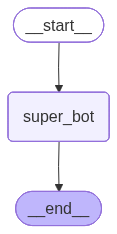

In [10]:
graph_builder=graph.compile()
graph_builder

In [13]:
graph_builder.invoke({"messages":"What is the capital of France?"})

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='75023cc1-7f4a-411c-bfaf-d2d3482a4de1'),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 42, 'total_tokens': 50, 'completion_time': 0.006814109, 'completion_tokens_details': None, 'prompt_time': 0.001906424, 'prompt_tokens_details': None, 'queue_time': 0.046183986, 'total_time': 0.008720533}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c85-1e0e-70d1-b8b7-02c6f00e4389-0', usage_metadata={'input_tokens': 42, 'output_tokens': 8, 'total_tokens': 50})]}

In [14]:
graph_builder.invoke({"messages":"What is the capital of India?"})

{'messages': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='b504ddf6-4ea2-4d38-9975-c41d39f52809'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.007115385, 'completion_tokens_details': None, 'prompt_time': 0.001936919, 'prompt_tokens_details': None, 'queue_time': 0.045810101, 'total_time': 0.009052304}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c87-1c74-7031-81f6-fc2799ffddfe-0', usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'total_tokens': 51})]}

In [21]:
#Streming the response from the chatbot
for event in graph_builder.stream({"messages":"What is the capital of Germany?"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='What is the capital of Germany?', additional_kwargs={}, response_metadata={}, id='8e5855e7-7099-4a17-a8ac-1903b3d4373d')]}
{'messages': [HumanMessage(content='What is the capital of Germany?', additional_kwargs={}, response_metadata={}, id='8e5855e7-7099-4a17-a8ac-1903b3d4373d'), AIMessage(content='The capital of Germany is Berlin.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 42, 'total_tokens': 50, 'completion_time': 0.007111858, 'completion_tokens_details': None, 'prompt_time': 0.002453101, 'prompt_tokens_details': None, 'queue_time': 0.046300958, 'total_time': 0.009564959}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3c8b-6fbc-73a2-a485-1ca10f7d5c64-0', usage_metadata={'input_tokens': 42, 'output_tokens': 8, 'total_tokens': 50})]}
